In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [4]:
%ls

'10th Mark sheet.jpg'
'12th marksheet.pdf'
 Aadhar.pdf
'Assignment for graymatics.zip'
 Assingnment/
'Colab Notebooks'/
'Custom objection lib'/
 darknet/
'Digital_Certificate from RGPV .pdf'
 emertxe_internship_certificate_Raghav_Sharma.pdf
'Enterprise Bot Assignment.zip'
 Files/
'Google Photos'/
'image captioning.mkv'
 openinapp.zip
'PAN card.jpg'
'Raghav java progates.pdf'
'Raghav Sharma cloud computing  certificate.pdf'
'RAGHAV SHARMA.pdf'
'resume photo-min.jpg'
 Surveillance_car_video.mp4
 vgg16/


In [5]:
%cd vgg16/

/content/drive/MyDrive/vgg16


In [6]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from matplotlib import pyplot as plt

In [7]:

# Set image size
IMAGE_SIZE = [180, 180]

# Define paths for training and validation data
train_path = '/content/drive/MyDrive/vgg16/dataset/train'   # Change with your train path
valid_path = '/content/drive/MyDrive/vgg16/dataset/val'     # Change with your validation path

In [8]:
# Load VGG16 model with pre-trained weights
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
# Freeze the layers of VGG16
for layer in vgg16.layers:
    layer.trainable = False

In [10]:
# Flatten the output of VGG16
x = Flatten()(vgg16.output)

In [11]:
# Add a fully connected layer with softmax activation for 27 classes
prediction = Dense(27, activation='softmax')(x)

In [12]:
# Create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [13]:
# View the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [14]:
# Model Compilation
model.compile(
    loss='categorical_crossentropy',
    metrics=[
        keras.metrics.Precision(name='precision'),
        'accuracy',
        keras.metrics.Recall(name='recall'),],optimizer='adam')

In [15]:
# Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=16,
    class_mode='categorical'
)

Found 3359 images belonging to 27 classes.


In [18]:
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(180, 180),
    batch_size=16,
    class_mode='categorical'
)

Found 359 images belonging to 27 classes.


In [19]:
# Define the paths for saving the best and last models
best_model_path = ''
last_model_path = ''

# Define the callbacks
callbacks = [
    ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True),
    ModelCheckpoint(last_model_path, save_weights_only=False, save_freq='epoch')
]

In [20]:
# Train the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=callbacks
)

Epoch 1/50
210/210 [==============================] - ETA: 0s - loss: 1.0000 - precision: 0.9568 - accuracy: 0.7392 - recall: 0.6073

210/210 [==============================] - 822s 4s/step - loss: 1.0000 - precision: 0.9568 - accuracy: 0.7392 - recall: 0.6073 - val_loss: 0.5453 - val_precision: 0.9549 - val_accuracy: 0.8579 - val_recall: 0.7660
Epoch 2/50
210/210 [==============================] - ETA: 0s - loss: 0.3472 - precision: 0.9804 - accuracy: 0.9098 - recall: 0.8494

210/210 [==============================] - 39s 185ms/step - loss: 0.3472 - precision: 0.9804 - accuracy: 0.9098 - recall: 0.8494 - val_loss: 0.4894 - val_precision: 0.9425 - val_accuracy: 0.8802 - val_recall: 0.8217
Epoch 3/50
210/210 [==============================] - ETA: 0s - loss: 0.2350 - precision: 0.9796 - accuracy: 0.9369 - recall: 0.9003

210/210 [==============================] - 39s 185ms/step - loss: 0.2350 - precision: 0.9796 - accuracy: 0.9369 - recall: 0.9003 - val_loss: 0.3917 - val_precision: 0.9776 - val_accuracy: 0.9081 - val_recall: 0.8524
Epoch 4/50
210/210 [==============================] - ETA: 0s - loss: 0.1871 - precision: 0.9807 - accuracy: 0.9515 - recall: 0.9235

210/210 [==============================] - 39s 184ms/step - loss: 0.1871 - precision: 0.9807 - accuracy: 0.9515 - recall: 0.9235 - val_loss: 0.3233 - val_precision: 0.9547 - val_accuracy: 0.9220 - val_recall: 0.8802
Epoch 5/50
210/210 [==============================] - ETA: 0s - loss: 0.1592 - precision: 0.9790 - accuracy: 0.9494 - recall: 0.9286

210/210 [==============================] - 36s 172ms/step - loss: 0.1592 - precision: 0.9790 - accuracy: 0.9494 - recall: 0.9286 - val_loss: 0.4220 - val_precision: 0.9145 - val_accuracy: 0.8747 - val_recall: 0.8635
Epoch 6/50
210/210 [==============================] - ETA: 0s - loss: 0.1400 - precision: 0.9823 - accuracy: 0.9604 - recall: 0.9425

210/210 [==============================] - 38s 182ms/step - loss: 0.1400 - precision: 0.9823 - accuracy: 0.9604 - recall: 0.9425 - val_loss: 0.3366 - val_precision: 0.9499 - val_accuracy: 0.9136 - val_recall: 0.8969
Epoch 7/50
210/210 [==============================] - ETA: 0s - loss: 0.1056 - precision: 0.9874 - accuracy: 0.9705 - recall: 0.9547

210/210 [==============================] - 38s 179ms/step - loss: 0.1056 - precision: 0.9874 - accuracy: 0.9705 - recall: 0.9547 - val_loss: 0.3451 - val_precision: 0.9531 - val_accuracy: 0.9192 - val_recall: 0.9053
Epoch 8/50
210/210 [==============================] - ETA: 0s - loss: 0.0950 - precision: 0.9872 - accuracy: 0.9744 - recall: 0.9646

210/210 [==============================] - 37s 178ms/step - loss: 0.0950 - precision: 0.9872 - accuracy: 0.9744 - recall: 0.9646 - val_loss: 0.3687 - val_precision: 0.9419 - val_accuracy: 0.9136 - val_recall: 0.9025
Epoch 9/50
210/210 [==============================] - ETA: 0s - loss: 0.0858 - precision: 0.9884 - accuracy: 0.9750 - recall: 0.9658

210/210 [==============================] - 37s 176ms/step - loss: 0.0858 - precision: 0.9884 - accuracy: 0.9750 - recall: 0.9658 - val_loss: 0.3489 - val_precision: 0.9441 - val_accuracy: 0.9220 - val_recall: 0.8942
Epoch 10/50
210/210 [==============================] - ETA: 0s - loss: 0.0601 - precision: 0.9924 - accuracy: 0.9857 - recall: 0.9771

210/210 [==============================] - 37s 175ms/step - loss: 0.0601 - precision: 0.9924 - accuracy: 0.9857 - recall: 0.9771 - val_loss: 0.3476 - val_precision: 0.9449 - val_accuracy: 0.9248 - val_recall: 0.9081
Epoch 11/50
210/210 [==============================] - ETA: 0s - loss: 0.0628 - precision: 0.9894 - accuracy: 0.9809 - recall: 0.9735

210/210 [==============================] - 37s 175ms/step - loss: 0.0628 - precision: 0.9894 - accuracy: 0.9809 - recall: 0.9735 - val_loss: 0.3429 - val_precision: 0.9592 - val_accuracy: 0.9276 - val_recall: 0.9164
Epoch 12/50
210/210 [==============================] - ETA: 0s - loss: 0.0501 - precision: 0.9946 - accuracy: 0.9881 - recall: 0.9809

210/210 [==============================] - 37s 176ms/step - loss: 0.0501 - precision: 0.9946 - accuracy: 0.9881 - recall: 0.9809 - val_loss: 0.3495 - val_precision: 0.9480 - val_accuracy: 0.9331 - val_recall: 0.9136
Epoch 13/50
210/210 [==============================] - ETA: 0s - loss: 0.0488 - precision: 0.9922 - accuracy: 0.9869 - recall: 0.9809

210/210 [==============================] - 37s 176ms/step - loss: 0.0488 - precision: 0.9922 - accuracy: 0.9869 - recall: 0.9809 - val_loss: 0.3616 - val_precision: 0.9483 - val_accuracy: 0.9276 - val_recall: 0.9192
Epoch 14/50
210/210 [==============================] - ETA: 0s - loss: 0.0515 - precision: 0.9916 - accuracy: 0.9878 - recall: 0.9809

210/210 [==============================] - 37s 174ms/step - loss: 0.0515 - precision: 0.9916 - accuracy: 0.9878 - recall: 0.9809 - val_loss: 0.3965 - val_precision: 0.9397 - val_accuracy: 0.9192 - val_recall: 0.9109
Epoch 15/50
210/210 [==============================] - ETA: 0s - loss: 0.0485 - precision: 0.9925 - accuracy: 0.9878 - recall: 0.9824

210/210 [==============================] - 37s 175ms/step - loss: 0.0485 - precision: 0.9925 - accuracy: 0.9878 - recall: 0.9824 - val_loss: 0.3384 - val_precision: 0.9462 - val_accuracy: 0.9387 - val_recall: 0.9304
Epoch 16/50
210/210 [==============================] - ETA: 0s - loss: 0.0402 - precision: 0.9934 - accuracy: 0.9890 - recall: 0.9854

210/210 [==============================] - 37s 174ms/step - loss: 0.0402 - precision: 0.9934 - accuracy: 0.9890 - recall: 0.9854 - val_loss: 0.3506 - val_precision: 0.9395 - val_accuracy: 0.9192 - val_recall: 0.9081
Epoch 17/50
210/210 [==============================] - ETA: 0s - loss: 0.0467 - precision: 0.9916 - accuracy: 0.9890 - recall: 0.9857

210/210 [==============================] - 37s 176ms/step - loss: 0.0467 - precision: 0.9916 - accuracy: 0.9890 - recall: 0.9857 - val_loss: 0.3552 - val_precision: 0.9366 - val_accuracy: 0.9164 - val_recall: 0.9053
Epoch 18/50
210/210 [==============================] - ETA: 0s - loss: 0.0511 - precision: 0.9874 - accuracy: 0.9815 - recall: 0.9783

210/210 [==============================] - 36s 173ms/step - loss: 0.0511 - precision: 0.9874 - accuracy: 0.9815 - recall: 0.9783 - val_loss: 0.3715 - val_precision: 0.9429 - val_accuracy: 0.9304 - val_recall: 0.9192
Epoch 19/50
210/210 [==============================] - ETA: 0s - loss: 0.0446 - precision: 0.9901 - accuracy: 0.9863 - recall: 0.9833

210/210 [==============================] - 38s 181ms/step - loss: 0.0446 - precision: 0.9901 - accuracy: 0.9863 - recall: 0.9833 - val_loss: 0.3932 - val_precision: 0.9371 - val_accuracy: 0.9220 - val_recall: 0.9136
Epoch 20/50
210/210 [==============================] - ETA: 0s - loss: 0.0575 - precision: 0.9847 - accuracy: 0.9804 - recall: 0.9780

210/210 [==============================] - 38s 179ms/step - loss: 0.0575 - precision: 0.9847 - accuracy: 0.9804 - recall: 0.9780 - val_loss: 0.4819 - val_precision: 0.9164 - val_accuracy: 0.8942 - val_recall: 0.8858
Epoch 21/50
210/210 [==============================] - ETA: 0s - loss: 0.0475 - precision: 0.9910 - accuracy: 0.9890 - recall: 0.9842

210/210 [==============================] - 36s 171ms/step - loss: 0.0475 - precision: 0.9910 - accuracy: 0.9890 - recall: 0.9842 - val_loss: 0.3675 - val_precision: 0.9398 - val_accuracy: 0.9248 - val_recall: 0.9136
Epoch 22/50
210/210 [==============================] - ETA: 0s - loss: 0.0406 - precision: 0.9910 - accuracy: 0.9878 - recall: 0.9857

210/210 [==============================] - 37s 176ms/step - loss: 0.0406 - precision: 0.9910 - accuracy: 0.9878 - recall: 0.9857 - val_loss: 0.7686 - val_precision: 0.8983 - val_accuracy: 0.8886 - val_recall: 0.8858
Epoch 23/50
210/210 [==============================] - ETA: 0s - loss: 0.0378 - precision: 0.9931 - accuracy: 0.9905 - recall: 0.9869

210/210 [==============================] - 37s 175ms/step - loss: 0.0378 - precision: 0.9931 - accuracy: 0.9905 - recall: 0.9869 - val_loss: 0.3962 - val_precision: 0.9375 - val_accuracy: 0.9276 - val_recall: 0.9192
Epoch 24/50
210/210 [==============================] - ETA: 0s - loss: 0.0223 - precision: 0.9949 - accuracy: 0.9937 - recall: 0.9917

210/210 [==============================] - 36s 174ms/step - loss: 0.0223 - precision: 0.9949 - accuracy: 0.9937 - recall: 0.9917 - val_loss: 0.4064 - val_precision: 0.9310 - val_accuracy: 0.9109 - val_recall: 0.9025
Epoch 25/50
210/210 [==============================] - ETA: 0s - loss: 0.0464 - precision: 0.9904 - accuracy: 0.9881 - recall: 0.9854

210/210 [==============================] - 36s 172ms/step - loss: 0.0464 - precision: 0.9904 - accuracy: 0.9881 - recall: 0.9854 - val_loss: 0.3732 - val_precision: 0.9463 - val_accuracy: 0.9331 - val_recall: 0.9331
Epoch 26/50
210/210 [==============================] - ETA: 0s - loss: 0.0297 - precision: 0.9922 - accuracy: 0.9908 - recall: 0.9896

210/210 [==============================] - 37s 175ms/step - loss: 0.0297 - precision: 0.9922 - accuracy: 0.9908 - recall: 0.9896 - val_loss: 0.4119 - val_precision: 0.9398 - val_accuracy: 0.9276 - val_recall: 0.9136
Epoch 27/50
210/210 [==============================] - ETA: 0s - loss: 0.0182 - precision: 0.9970 - accuracy: 0.9952 - recall: 0.9943

210/210 [==============================] - 38s 179ms/step - loss: 0.0182 - precision: 0.9970 - accuracy: 0.9952 - recall: 0.9943 - val_loss: 0.5480 - val_precision: 0.9148 - val_accuracy: 0.8997 - val_recall: 0.8969
Epoch 28/50
210/210 [==============================] - ETA: 0s - loss: 0.0258 - precision: 0.9943 - accuracy: 0.9932 - recall: 0.9917

210/210 [==============================] - 37s 178ms/step - loss: 0.0258 - precision: 0.9943 - accuracy: 0.9932 - recall: 0.9917 - val_loss: 0.5564 - val_precision: 0.8994 - val_accuracy: 0.8858 - val_recall: 0.8719
Epoch 29/50
210/210 [==============================] - ETA: 0s - loss: 0.0462 - precision: 0.9880 - accuracy: 0.9848 - recall: 0.9824

210/210 [==============================] - 37s 174ms/step - loss: 0.0462 - precision: 0.9880 - accuracy: 0.9848 - recall: 0.9824 - val_loss: 0.4235 - val_precision: 0.9237 - val_accuracy: 0.9136 - val_recall: 0.9109
Epoch 30/50
210/210 [==============================] - ETA: 0s - loss: 0.0461 - precision: 0.9889 - accuracy: 0.9857 - recall: 0.9821

210/210 [==============================] - 37s 176ms/step - loss: 0.0461 - precision: 0.9889 - accuracy: 0.9857 - recall: 0.9821 - val_loss: 0.5008 - val_precision: 0.9242 - val_accuracy: 0.9164 - val_recall: 0.9164
Epoch 31/50
210/210 [==============================] - ETA: 0s - loss: 0.0392 - precision: 0.9911 - accuracy: 0.9896 - recall: 0.9890

210/210 [==============================] - 36s 171ms/step - loss: 0.0392 - precision: 0.9911 - accuracy: 0.9896 - recall: 0.9890 - val_loss: 0.4481 - val_precision: 0.9437 - val_accuracy: 0.9359 - val_recall: 0.9331
Epoch 32/50
210/210 [==============================] - ETA: 0s - loss: 0.0258 - precision: 0.9946 - accuracy: 0.9932 - recall: 0.9926

210/210 [==============================] - 37s 176ms/step - loss: 0.0258 - precision: 0.9946 - accuracy: 0.9932 - recall: 0.9926 - val_loss: 0.4771 - val_precision: 0.9298 - val_accuracy: 0.9248 - val_recall: 0.9220
Epoch 33/50
210/210 [==============================] - ETA: 0s - loss: 0.0192 - precision: 0.9967 - accuracy: 0.9958 - recall: 0.9952

210/210 [==============================] - 37s 175ms/step - loss: 0.0192 - precision: 0.9967 - accuracy: 0.9958 - recall: 0.9952 - val_loss: 0.4682 - val_precision: 0.9407 - val_accuracy: 0.9276 - val_recall: 0.9276
Epoch 34/50
210/210 [==============================] - ETA: 0s - loss: 0.0266 - precision: 0.9908 - accuracy: 0.9905 - recall: 0.9896

210/210 [==============================] - 36s 169ms/step - loss: 0.0266 - precision: 0.9908 - accuracy: 0.9905 - recall: 0.9896 - val_loss: 0.4806 - val_precision: 0.9216 - val_accuracy: 0.9164 - val_recall: 0.9164
Epoch 35/50
210/210 [==============================] - ETA: 0s - loss: 0.0171 - precision: 0.9949 - accuracy: 0.9943 - recall: 0.9937

210/210 [==============================] - 37s 175ms/step - loss: 0.0171 - precision: 0.9949 - accuracy: 0.9943 - recall: 0.9937 - val_loss: 0.5225 - val_precision: 0.9371 - val_accuracy: 0.9220 - val_recall: 0.9136
Epoch 36/50
210/210 [==============================] - ETA: 0s - loss: 0.0266 - precision: 0.9940 - accuracy: 0.9937 - recall: 0.9926

210/210 [==============================] - 38s 181ms/step - loss: 0.0266 - precision: 0.9940 - accuracy: 0.9937 - recall: 0.9926 - val_loss: 0.4903 - val_precision: 0.9352 - val_accuracy: 0.9276 - val_recall: 0.9248
Epoch 37/50
210/210 [==============================] - ETA: 0s - loss: 0.0229 - precision: 0.9940 - accuracy: 0.9929 - recall: 0.9926

210/210 [==============================] - 36s 172ms/step - loss: 0.0229 - precision: 0.9940 - accuracy: 0.9929 - recall: 0.9926 - val_loss: 0.4860 - val_precision: 0.9207 - val_accuracy: 0.9136 - val_recall: 0.9053
Epoch 38/50
210/210 [==============================] - ETA: 0s - loss: 0.0324 - precision: 0.9928 - accuracy: 0.9920 - recall: 0.9914

210/210 [==============================] - 37s 174ms/step - loss: 0.0324 - precision: 0.9928 - accuracy: 0.9920 - recall: 0.9914 - val_loss: 0.3543 - val_precision: 0.9516 - val_accuracy: 0.9387 - val_recall: 0.9304
Epoch 39/50
210/210 [==============================] - ETA: 0s - loss: 0.0339 - precision: 0.9919 - accuracy: 0.9908 - recall: 0.9890

210/210 [==============================] - 36s 173ms/step - loss: 0.0339 - precision: 0.9919 - accuracy: 0.9908 - recall: 0.9890 - val_loss: 0.4827 - val_precision: 0.9300 - val_accuracy: 0.9276 - val_recall: 0.9248
Epoch 40/50
210/210 [==============================] - ETA: 0s - loss: 0.0359 - precision: 0.9910 - accuracy: 0.9890 - recall: 0.9878

210/210 [==============================] - 36s 172ms/step - loss: 0.0359 - precision: 0.9910 - accuracy: 0.9890 - recall: 0.9878 - val_loss: 0.5104 - val_precision: 0.9263 - val_accuracy: 0.9220 - val_recall: 0.9109
Epoch 41/50
210/210 [==============================] - ETA: 0s - loss: 0.0222 - precision: 0.9943 - accuracy: 0.9935 - recall: 0.9932

210/210 [==============================] - 35s 168ms/step - loss: 0.0222 - precision: 0.9943 - accuracy: 0.9935 - recall: 0.9932 - val_loss: 0.5070 - val_precision: 0.9298 - val_accuracy: 0.9220 - val_recall: 0.9220
Epoch 42/50
210/210 [==============================] - ETA: 0s - loss: 0.0121 - precision: 0.9979 - accuracy: 0.9970 - recall: 0.9964

210/210 [==============================] - 37s 174ms/step - loss: 0.0121 - precision: 0.9979 - accuracy: 0.9970 - recall: 0.9964 - val_loss: 0.4664 - val_precision: 0.9246 - val_accuracy: 0.9220 - val_recall: 0.9220
Epoch 43/50
210/210 [==============================] - ETA: 0s - loss: 0.0192 - precision: 0.9943 - accuracy: 0.9926 - recall: 0.9917

210/210 [==============================] - 37s 174ms/step - loss: 0.0192 - precision: 0.9943 - accuracy: 0.9926 - recall: 0.9917 - val_loss: 0.3767 - val_precision: 0.9296 - val_accuracy: 0.9248 - val_recall: 0.9192
Epoch 44/50
210/210 [==============================] - ETA: 0s - loss: 0.0328 - precision: 0.9911 - accuracy: 0.9899 - recall: 0.9893

210/210 [==============================] - 36s 171ms/step - loss: 0.0328 - precision: 0.9911 - accuracy: 0.9899 - recall: 0.9893 - val_loss: 0.6383 - val_precision: 0.9022 - val_accuracy: 0.8997 - val_recall: 0.8997
Epoch 45/50
210/210 [==============================] - ETA: 0s - loss: 0.0487 - precision: 0.9890 - accuracy: 0.9872 - recall: 0.9860

210/210 [==============================] - 36s 174ms/step - loss: 0.0487 - precision: 0.9890 - accuracy: 0.9872 - recall: 0.9860 - val_loss: 0.7208 - val_precision: 0.9153 - val_accuracy: 0.9025 - val_recall: 0.9025
Epoch 46/50
210/210 [==============================] - ETA: 0s - loss: 0.0253 - precision: 0.9946 - accuracy: 0.9935 - recall: 0.9935

210/210 [==============================] - 36s 172ms/step - loss: 0.0253 - precision: 0.9946 - accuracy: 0.9935 - recall: 0.9935 - val_loss: 0.4668 - val_precision: 0.9437 - val_accuracy: 0.9359 - val_recall: 0.9331
Epoch 47/50
210/210 [==============================] - ETA: 0s - loss: 0.0054 - precision: 0.9994 - accuracy: 0.9988 - recall: 0.9988

210/210 [==============================] - 37s 174ms/step - loss: 0.0054 - precision: 0.9994 - accuracy: 0.9988 - recall: 0.9988 - val_loss: 0.4288 - val_precision: 0.9380 - val_accuracy: 0.9304 - val_recall: 0.9276
Epoch 48/50
210/210 [==============================] - ETA: 0s - loss: 0.0059 - precision: 0.9982 - accuracy: 0.9979 - recall: 0.9976

210/210 [==============================] - 37s 174ms/step - loss: 0.0059 - precision: 0.9982 - accuracy: 0.9979 - recall: 0.9976 - val_loss: 0.3647 - val_precision: 0.9358 - val_accuracy: 0.9331 - val_recall: 0.9331
Epoch 49/50
210/210 [==============================] - ETA: 0s - loss: 0.0111 - precision: 0.9967 - accuracy: 0.9964 - recall: 0.9961

210/210 [==============================] - 37s 176ms/step - loss: 0.0111 - precision: 0.9967 - accuracy: 0.9964 - recall: 0.9961 - val_loss: 0.4544 - val_precision: 0.9384 - val_accuracy: 0.9331 - val_recall: 0.9331
Epoch 50/50
210/210 [==============================] - ETA: 0s - loss: 0.0276 - precision: 0.9925 - accuracy: 0.9914 - recall: 0.9911

210/210 [==============================] - 49s 234ms/step - loss: 0.0276 - precision: 0.9925 - accuracy: 0.9914 - recall: 0.9911 - val_loss: 0.6419 - val_precision: 0.9270 - val_accuracy: 0.9220 - val_recall: 0.9192


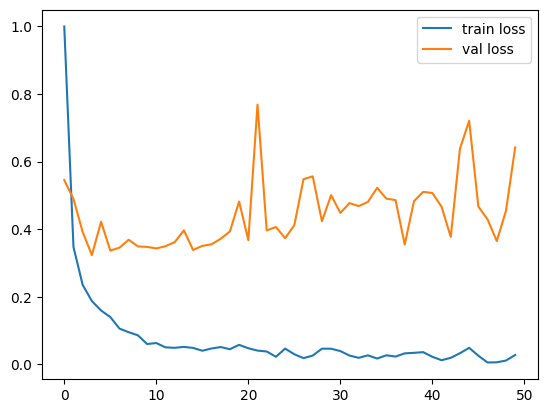

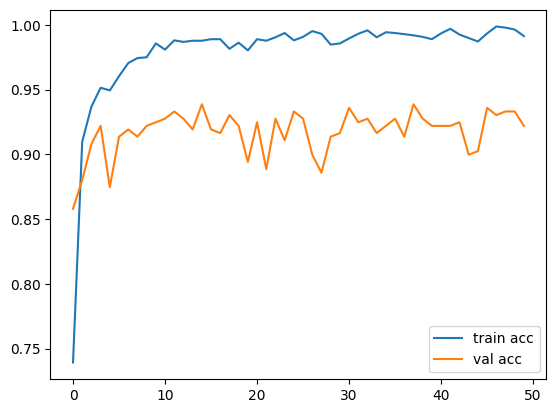

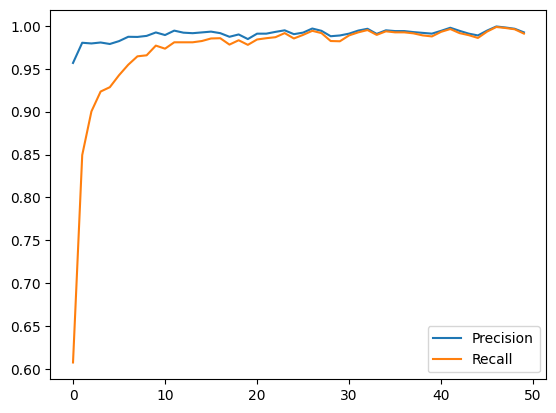

<Figure size 640x480 with 0 Axes>

In [21]:
#Visualizing loss of test and train
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
print()
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
print()
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['recall'], label='Recall')
plt.legend()
plt.show()
plt.savefig('prec_rec')


In [22]:
#saving model
from tensorflow.keras.models import load_model
model_path = '/content/drive/MyDrive/i2v/vgg16/vgg16_model.h5'
# Save the model
model.save(model_path)

In [23]:
#evaluating model with respect to train
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(training_set)

210/210 [==============================] - 36s 171ms/step - loss: 0.0393 - precision: 0.9919 - accuracy: 0.9890 - recall: 0.9884


In [24]:
#evaluating model with respect to test
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(test_set)

23/23 [==============================] - 1s 51ms/step - loss: 0.6419 - precision: 0.9270 - accuracy: 0.9220 - recall: 0.9192


In [25]:
pred_X = model.predict(training_set)

210/210 [==============================] - 35s 163ms/step


In [26]:
pred_Y = model.predict(test_set)

23/23 [==============================] - 1s 46ms/step


In [28]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)

Test Loss: 0.039336882531642914
Test Accuracy: 0.9919330477714539
Test Precision: 0.9889848232269287
Test Recall: 0.9883893728256226
Validation Loss: 0.6419097781181335
Validation Accuracy: 0.9269663095474243
Validation Precision: 0.9220055937767029
Validation Recall: 0.9192200303077698
